# AMPSphere v.2022-03

This is a notebook meant to form the set of notebooks used to analyze the data in AMPSphere and write the manuscript:

__AMPSphere: Global survey of prokaryotic antimicrobial peptides shaping microbiomes__
    
### Analysis of motifs from c_AMPs

We mapped using Regex rules for prokaryotic peptide motifs described before by [Ruhanen et al. (2014)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3896991/)
and [Huan et al. (2020)](https://pubmed.ncbi.nlm.nih.gov/33178164/), classifying a family as containing a motif when at least 75% of its members presented the motif.
These motifs were mostly related to antimicrobial activity and inhibition of intracellular targets.


In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import chain

In [2]:
motif = ['tle target', 'ion-pair-pi', 'vinculin',
         'gly-central–symmetrical', 'leulystrp',
         'cbp-a', 'dock_MAPK', 'guanine nucleotide exchange',
         'kld12', 'γ-core motif', 'golgi_lock',
         'arginine finger motif', 'cargo', 'walker',
         'bact7', 'cspa', 'kwarn', 'lfcinb', 'atcun',
         'pest-motif', 'siderophore', 'eno',
         'autoproteolytic cleavage motif', 'chemotaxis', 'spsa',
         'ngr motif', 'gly zipper', 'n-myristoylation/s-palmitoylation motif',
         'yada', 'ABC_motif', 'adherence', 'capsule', 'rgd',
         'lipid binding motif', 'gala', 'mtpm', 'rana box', 'type_iv',
         'bfii', 'bact5', 'caax box']

In [3]:
# load annotations
anno = pd.read_table('data/AMPSphere_v.2022-03.annotation.tsv.gz',
                     sep='\t',
                     header='infer')

anno = anno.fillna('wo_motif')
anno['motif_match'] = [x.split('|') for x in anno.motif_match]
anno = anno[['id', 'motif_match']]

m = set(chain.from_iterable(anno['motif_match']))
for c in m:
    anno[c] = [1 if c in x else 0 for x in anno.motif_match]
    
anno = anno.drop('motif_match', axis=1)

In [4]:
# load families
fam = pd.read_table('data/SPHERE_v.2022-03.levels_assessment.tsv.gz',
                    sep='\t', 
                    header='infer')

fam = fam[['AMP accession', 'SPHERE_fam level III']]

fam = fam.rename({'AMP accession': 'id',
                  'SPHERE_fam level III': 'family'},
                  axis=1)

In [5]:
# merge families
df = anno.merge(on='id', right=fam)

k = 863_498 - len(df[df['wo_motif'] == 1])
k = k * 100 / 863_498
print(f'{k}% of c_AMPs presented at least 1 motif')

77.25159757173728% of c_AMPs presented at least 1 motif


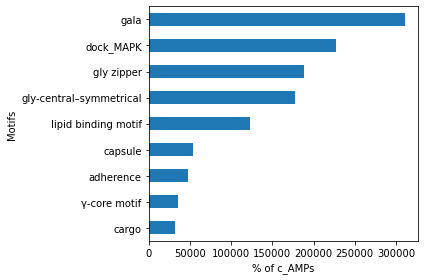

In [6]:
# plotting most abundant motifs
fig, ax = plt.subplots()

idf = df.drop(['id', 'family'], axis=1).sum(axis=0)
idf = idf.drop('wo_motif', axis=0)
idf = idf.sort_values()

# top 25%
part = int(len(idf) / 4)
idf = idf.tail(part)

idf.plot.barh()
plt.xlabel('% of c_AMPs')
plt.ylabel('Motifs')
plt.tight_layout()

In [7]:
# load quality
qual = pd.read_table('data/quality_families.txt.gz')
qual = qual[qual.total >= 8]
qual = qual[(qual.experimental_evidence == True) | (qual.perc >= 75)]
qual = qual['family'].tolist()

In [8]:
# organize table with motifs and family counts
df = df[df.family.isin(qual)]
data = df.drop('id', axis=1)
data = data.groupby('family')
data = data.agg('sum')

In [9]:
# getting percent of families presenting motifs
fam_size = fam.family.value_counts()
fam_size = fam_size.loc[qual]

data = data.loc[qual].T / fam_size
data = data.T * 100

data

,siderophore,cbp-a,bfii,γ-core motif,pest-motif,cargo,lfcinb,eno,gala,ion-pair-pi,...,bact5,lipid binding motif,gly-central–symmetrical,capsule,atcun,chemotaxis,kld12,n-myristoylation/s-palmitoylation motif,ngr motif,type_iv
family,,,,,,,,,,,,,,,,,,,,,
SPHERE-III.000_000,7.597765,0.0,0.726257,0.000000,0.0,0.000000,0.0,0.0,96.927374,0.0,...,0.0,2.960894,0.055866,2.122905,0.0,0.0,0.055866,0.0,0.000000,0.000000
SPHERE-III.000_001,0.000000,0.0,0.000000,0.114679,0.0,0.114679,0.0,0.0,0.000000,0.0,...,0.0,0.573394,0.688073,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.229358
SPHERE-III.000_002,0.366300,0.0,0.000000,99.816850,0.0,0.915751,0.0,0.0,4.395604,0.0,...,0.0,20.329670,5.311355,0.549451,0.0,0.0,0.000000,0.0,26.556777,1.648352
SPHERE-III.000_003,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,13.480885,0.0,...,0.0,0.000000,35.412475,0.000000,0.0,0.0,0.000000,0.0,0.201207,0.000000
SPHERE-III.000_004,9.619687,0.0,12.527964,0.000000,0.0,0.000000,0.0,0.0,98.434004,0.0,...,0.0,0.894855,0.223714,0.894855,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPHERE-III.008_772,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,100.000000,0.0,...,0.0,0.000000,12.500000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
SPHERE-III.008_777,0.000000,0.0,0.000000,37.500000,0.0,0.000000,0.0,0.0,37.500000,0.0,...,0.0,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
SPHERE-III.008_779,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [10]:
# processing motifs
bdf = (data >= 75).T

fampermotif = bdf.sum(axis=1).reset_index()
fampermotif = fampermotif.sort_values(by=0)
fampermotif = fampermotif[fampermotif[0] > 0]

fampermotif = fampermotif.rename({'index': 'Motifs',
                                  0: 'High-quality families'},
                                 axis=1)

fampermotif

,Motifs,High-quality families
16,cspa,1
1,cbp-a,1
15,golgi_lock,4
23,caax box,7
24,rgd,8
38,ngr motif,11
19,guanine nucleotide exchange,11
2,bfii,12
36,kld12,15
30,bact5,16


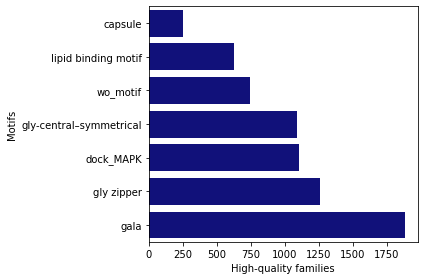

In [11]:
fig, ax = plt.subplots()

# top 25%
part = int(len(fampermotif) / 4)

sns.barplot(ax=ax,
            data=fampermotif.tail(part),
            y='Motifs',
            x='High-quality families',
            orient='h',
            color='darkblue')

plt.tight_layout()